In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
datadir = '../data/'

In [3]:
def _read_file(fname, enc='iso8859-8'):
    fd = open(fname, encoding=enc, errors='replace')
    df = pd.read_csv(fd, sep='|')
    return df

def add_model(df):
    df['model'] = df.apply(lambda x: '_'.join([x[y] for y in ['tozeret_cd', 'degem_cd', 'shnat_yitzur', 'sug_degem']]), axis=1)

def get_model_name(ns):
    names = pd.DataFrame(data={'model':ns})
    ret = pd.merge(names, models, how='left', on='model')[['tozeret_nm', 'kinuy_mishari']]
    return ret

In [4]:
# source : https://data.gov.il/dataset/private-and-commercial-vehicles/resource/053cea08-09bc-40ec-8f7a-156f0677aff3?inner_span=True

#df = pd.read_csv('data/rechev-small.csv', encoding='iso-8859-1', sep='|')

def read_file(fname):
    fname = datadir + fname
    df = _read_file(fname)

    for c in ['mispar_rechev', 'degem_cd', 'tozeret_cd', 'shnat_yitzur']:
        df[c] = df[c].astype(str)

    df['test']= pd.to_datetime(df.mivchan_acharon_dt)
    df['test_expiry']= pd.to_datetime(df.tokef_dt)    
    add_model(df)
    return df

In [5]:
df = read_file('rechev.csv')

In [6]:
df['X'] = df['mispar_rechev']
df['X'].apply(len).value_counts()

7    2264203
8    1473015
Name: X, dtype: int64

In [7]:
def add_counts(acc, s):
    for i in range(len(s)):
        d = int(s[i])
        acc[i, d] += 1    

def get_counts(df, length):
    ret = np.zeros((length, 10), int)

    # Filter rows by string length
    filtered_df = df[df['X'].str.len() == length]
    
    filtered_df['X'].apply(lambda x: add_counts(ret, x))
    
    return ret

In [8]:
l8 = get_counts(df, 8)
l7 = get_counts(df, 7)

In [9]:
plt.rcParams["figure.figsize"] = [8, 14]
plt.rcParams["figure.autolayout"] = False

sns.set_style("whitegrid")

def rev(s):
    return s[::-1]

def plot_all(n, d):
    fig, ax = plt.subplots(n, 1)

    for i in range(n):
        ddf = pd.DataFrame(data={'count' : d[i],})
        ddf=ddf.reset_index().rename(columns={'index':'position'})
        sns.barplot(ax=ax[i], data=ddf, y='count', x='position')
        #ax[i].set(ylabel=None)
        s = rev('מיקום ' + str(i))
        ax[i].set(ylabel=s)
        ax[i].tick_params(labelleft=False)
    ax[n-1].set(xlabel=rev('ספרה'))

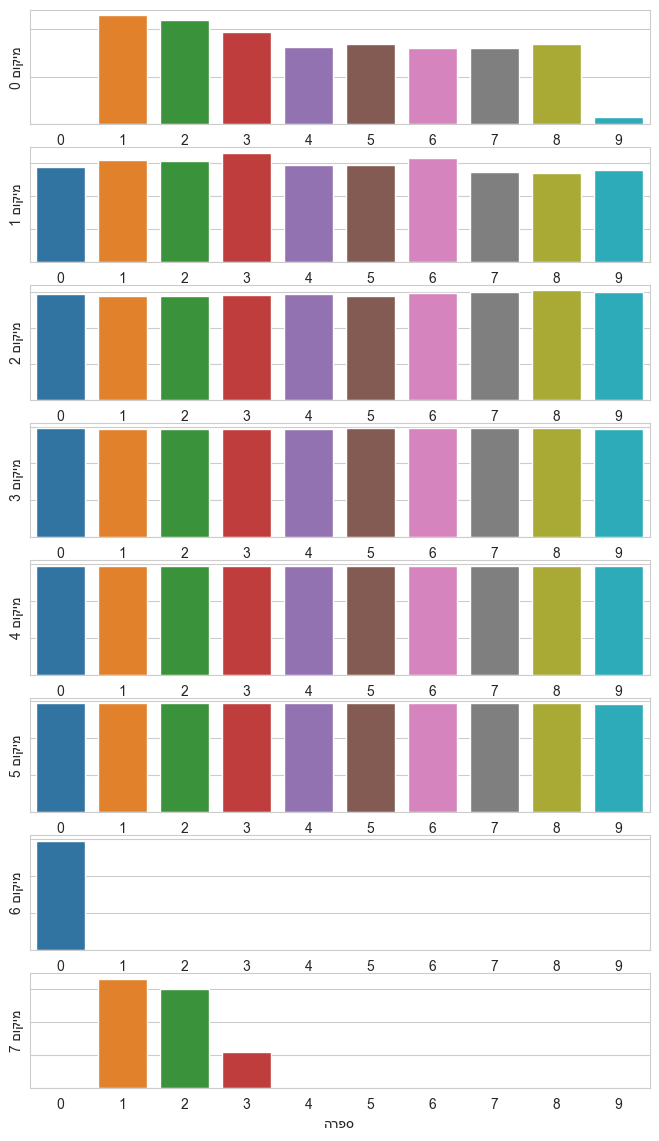

In [10]:
plot_all(8, l8)

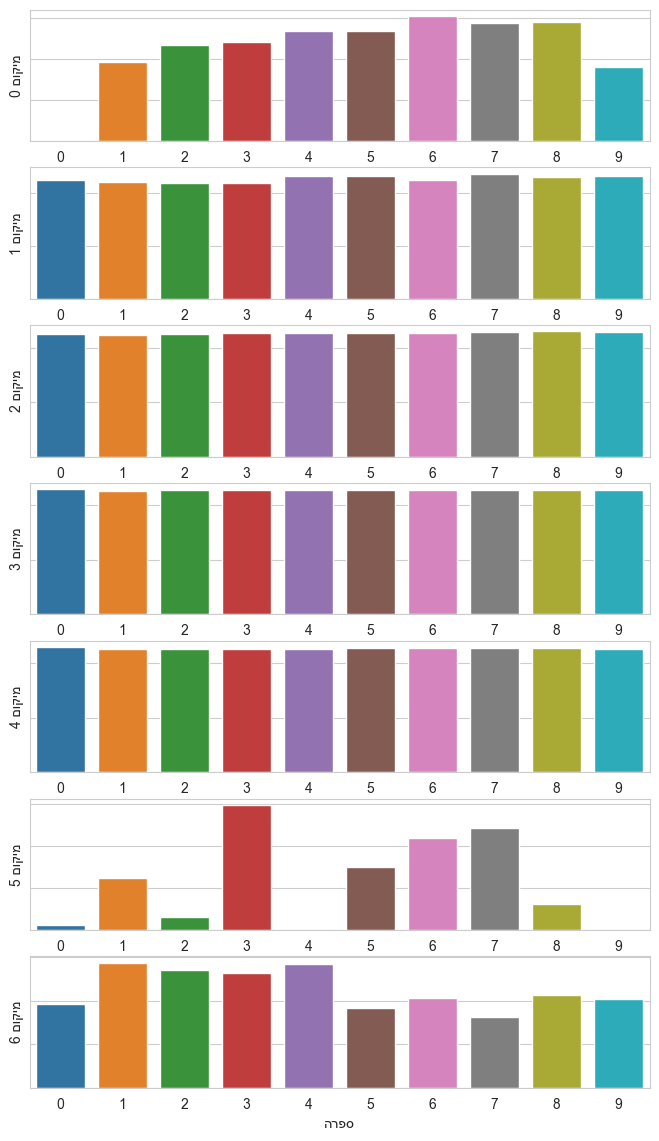

In [11]:
plot_all(7, l7)

In [12]:
df[(df['X'].str.match('.....4')) & (df['X'].str.len() == 7)].to_dict()

{'mispar_rechev': {81683: '1272040'},
 'tozeret_cd': {81683: '973'},
 'sug_degem': {81683: 'M'},
 'tozeret_nm': {81683: 'איסוזו תאילנד'},
 'degem_cd': {81683: '92'},
 'degem_nm': {81683: 'TFS86'},
 'ramat_gimur': {81683: 'S'},
 'ramat_eivzur_betihuty': {81683: nan},
 'kvutzat_zihum': {81683: 15.0},
 'shnat_yitzur': {81683: '2017'},
 'degem_manoa': {81683: '4JK1'},
 'mivchan_acharon_dt': {81683: '2021-12-16'},
 'tokef_dt': {81683: '2023-01-04'},
 'baalut': {81683: 'חברה'},
 'misgeret': {81683: 'MPATFS86JGR011876'},
 'tzeva_cd': {81683: 29},
 'tzeva_rechev': {81683: 'כסף מטלי'},
 'zmig_kidmi': {81683: '245/70R16'},
 'zmig_ahori': {81683: '245/70R16'},
 'sug_delek_nm': {81683: 'דיזל'},
 'horaat_rishum': {81683: 160133.0},
 'moed_aliya_lakvish': {81683: '2017-1'},
 'kinuy_mishari': {81683: 'PICK - UP'},
 'test': {81683: Timestamp('2021-12-16 00:00:00')},
 'test_expiry': {81683: Timestamp('2023-01-04 00:00:00')},
 'model': {81683: '973_92_2017_M'},
 'X': {81683: '1272040'}}

In [13]:
d0 = df[(df['X'].str.match('.....0')) & (df['X'].str.len() == 7)]

In [14]:
d0.kinuy_mishari.value_counts()

JAZZ                   2800
COROLLA                2314
CIVIC                  1554
SX4 CROSSOVER          1326
VITARA                 1307
                       ... 
406                       1
318IS.A-2                 1
במוו AI 825               1
RETXOB פרטי 2 דלתות       1
פגרו ארוך דיזל ידני       1
Name: kinuy_mishari, Length: 279, dtype: int64

In [15]:
d0.shnat_yitzur.value_counts()

2016    8943
2017    8704
2005    3614
1996     159
1998      92
1997      77
2004      44
1999      27
2006      16
2000      13
2001       8
2003       7
2002       7
2018       2
2008       1
2007       1
Name: shnat_yitzur, dtype: int64

In [16]:
d0.query('degem_nm == "GK38"').loc[415218].to_dict()

{'mispar_rechev': '4111908',
 'tozeret_cd': '312',
 'sug_degem': 'P',
 'tozeret_nm': 'הונדה-יפן',
 'degem_cd': '19',
 'degem_nm': 'GK38',
 'ramat_gimur': 'COMFORT',
 'ramat_eivzur_betihuty': 1.0,
 'kvutzat_zihum': 6.0,
 'shnat_yitzur': '2016',
 'degem_manoa': 'L13B2',
 'mivchan_acharon_dt': '2022-06-27',
 'tokef_dt': '2023-06-05',
 'baalut': 'פרטי',
 'misgeret': 'JHMGK3850GX238623',
 'tzeva_cd': 80,
 'tzeva_rechev': 'שנהב לבן',
 'zmig_kidmi': '185/60R15',
 'zmig_ahori': '185/60R15',
 'sug_delek_nm': 'בנזין',
 'horaat_rishum': 160282.0,
 'moed_aliya_lakvish': '2016-6',
 'kinuy_mishari': 'JAZZ',
 'test': Timestamp('2022-06-27 00:00:00'),
 'test_expiry': Timestamp('2023-06-05 00:00:00'),
 'model': '312_19_2016_P',
 'X': '4111908'}

In [17]:
d9=df[(df['X'].str.match('^9')) & (df['X'].str.len() == 8)]

In [18]:
d9.kinuy_mishari.value_counts()

OCTAVIA           2874
FLUENCE           1408
CEED               874
OPTIMA             832
C200CDI            676
                  ... 
C1                   1
E300                 1
MUSTANG MACH-E       1
LANTIS-323           1
E-S2                 1
Name: kinuy_mishari, Length: 401, dtype: int64

In [19]:
d9.shnat_yitzur.value_counts()

2016    2809
2017    2484
2015    2417
2018    1655
2014    1537
2013    1059
2019     939
2012     674
2011     449
2010     397
2020     240
2008     238
2009     205
2021      91
2007      71
2006      38
2022      17
2005      11
2003       7
2004       4
2000       2
2002       1
1998       1
1999       1
Name: shnat_yitzur, dtype: int64

In [23]:
df['X'].apply(lambda k: int(k[-1])%2).value_counts() / len(df)

1    0.529175
0    0.470825
Name: X, dtype: float64

In [22]:
l7[5]

array([ 21715, 244615,  59534, 594281,      1, 300745, 434310, 483547,
       125455,      0])